# Classification for Bank DataSet

### importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importing DataSet

In [3]:
df = pd.read_csv('bank.csv')

### Data

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [7]:
# Information about the DataSet

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
# Statistical Data

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Data Visualization

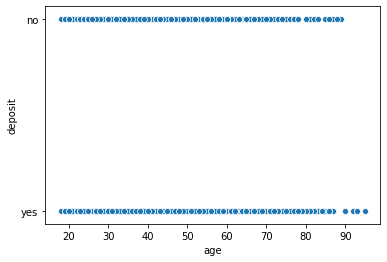

In [9]:
# age vs deposit

sns.scatterplot(x = df['age'], y = df['deposit'], data = df)

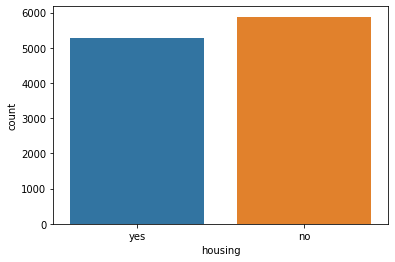

In [11]:
# Housing Loan Members

sns.countplot(x = df['housing'], data = df)

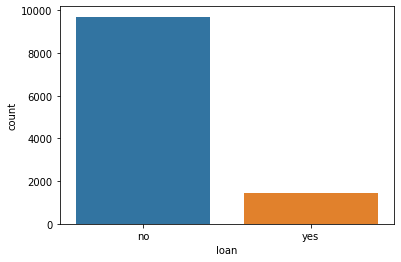

In [12]:
# Personal Loan Members

sns.countplot(x = df['loan'], data = df)

# Naive Bayes Algorithm

In [64]:
# Dependent and Independent Variables

x = df.iloc[:, 0:16]
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown


In [65]:
y = df.iloc[:, -1]
y.head()

0    yes
1    yes
2    yes
3    yes
4    yes
Name: deposit, dtype: object

In [66]:
# Encoding the Data

from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
x['marital'] = le.fit_transform(x['marital'])
x['job'] = le.fit_transform(x['job'])
x['education'] = le.fit_transform(x['education'])
x['job'] = le.fit_transform(x['default'])
x['housing'] = le.fit_transform(x['housing'])
x['loan'] = le.fit_transform(x['loan'])
x['default'] = le.fit_transform(x['default'])
x['contact'] = le.fit_transform(x['contact'])
x['month'] = le.fit_transform(x['month'])
x['poutcome'] = le.fit_transform(x['poutcome'])

In [25]:
# Train and Test Data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
# Build the Model

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [27]:
# train the model

model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
# Predicting the Output

preds = model.predict(x_test)
preds

array(['yes', 'no', 'no', ..., 'yes', 'no', 'no'], dtype='<U3')

In [30]:
# Accuracy of the Model

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, preds))

print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

          no       0.80      0.69      0.75      1205
         yes       0.69      0.80      0.74      1028

    accuracy                           0.74      2233
   macro avg       0.75      0.75      0.74      2233
weighted avg       0.75      0.74      0.74      2233

[[837 368]
 [204 824]]


**Accuracy = 74%**

# AdaBoosting

In [32]:
x.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3


In [33]:
y.head()

0    yes
1    yes
2    yes
3    yes
4    yes
Name: deposit, dtype: object

In [34]:
# Train and Test Data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [35]:
# Perform AdaBoost

from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)

In [36]:
# Training the Data

model.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=30, random_state=7)

In [37]:
# Predciting the Data

ada_pred  =  model.predict(x_test)
ada_pred

array(['no', 'yes', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [38]:
# Accuracy

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
ada_cm = confusion_matrix(y_test, ada_pred)
ada_ac = accuracy_score(y_test,ada_pred)

In [39]:
ada_cm

array([[996, 209],
       [216, 812]], dtype=int64)

In [40]:
ada_ac

0.8096730855351545

**Accuracy = 80.9%**

# KNN Classification

In [47]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,0,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,0,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3


In [48]:
df.drop(['deposit'], axis = 1, inplace = True)

In [49]:
df['deposit'] = y

In [50]:
# Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x = ss.fit_transform(x)

In [52]:
# Train and Test Data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [53]:
# Build the Model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [54]:
# Training the Model

knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
# Predicting the Output

ypred = knn.predict(x_test)
ypred

array(['no', 'yes', 'no', ..., 'no', 'yes', 'yes'], dtype=object)

In [56]:
# Accuracy of the Model

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

accuracy = accuracy_score(y_test, ypred)
accuracy

0.783517467900866

In [57]:
# Confusion Matrix

confusion_matrix(y_test, ypred)

array([[1484,  308],
       [ 417, 1140]], dtype=int64)

In [58]:
# Classification Reports

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

          no       0.78      0.83      0.80      1792
         yes       0.79      0.73      0.76      1557

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



**Accuracy = 78%**

# Decision Tree Classifier

In [67]:
y.head()

0    yes
1    yes
2    yes
3    yes
4    yes
Name: deposit, dtype: object

In [68]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,0,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,0,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3


In [69]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x = ss.fit_transform(x)

In [70]:
# Train and Test Data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [71]:
# Build the Model

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

In [72]:
# training the model

tree_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [73]:
# predicting

predictions = tree_model.predict(x_test)

In [74]:
# Accuracy

from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix = \n", confusion_matrix(y_test, predictions))

print("Classification Report = \n", classification_report(y_test, predictions))

Confusion Matrix = 
 [[1425  367]
 [ 401 1156]]
Classification Report = 
               precision    recall  f1-score   support

          no       0.78      0.80      0.79      1792
         yes       0.76      0.74      0.75      1557

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349



**Accuracy = 77%**

# Random Tree Classifier

In [75]:
# Dependent and Independent Variables

x = df.iloc[:, 0:16]

y = df.iloc[:, -1].values

In [76]:
# Encoding the Data

from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
x['marital'] = le.fit_transform(x['marital'])
x['job'] = le.fit_transform(x['job'])
x['education'] = le.fit_transform(x['education'])
x['default'] = le.fit_transform(x['default'])
x['housing'] = le.fit_transform(x['housing'])
x['loan'] = le.fit_transform(x['loan'])
x['default'] = le.fit_transform(x['default'])
x['contact'] = le.fit_transform(x['contact'])
x['month'] = le.fit_transform(x['month'])
x['poutcome'] = le.fit_transform(x['poutcome'])

y = le.fit_transform(y)

In [77]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x = ss.fit_transform(x)

In [78]:
# Train and Test Data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [79]:
# Build the Model

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 70)

In [80]:
# train the model

rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
# Prediciting the Output

preds = rfc.predict(x_test)
preds

array([0, 1, 0, ..., 0, 1, 1])

In [84]:
# Accuracy

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix = \n", confusion_matrix(y_test, preds))

print("Classification Report = \n", classification_report(y_test, preds))

Confusion Matrix = 
 [[1502  290]
 [ 230 1327]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1792
           1       0.82      0.85      0.84      1557

    accuracy                           0.84      3349
   macro avg       0.84      0.85      0.84      3349
weighted avg       0.85      0.84      0.84      3349



**Accuracy = 84%**

# ANN Classification

In [85]:
# Dependent and Independent Variables

x = df.iloc[:, 0:16]

y = df.iloc[:, -1].values

In [86]:
# Encoding the Data

from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
x['marital'] = le.fit_transform(x['marital'])
x['job'] = le.fit_transform(x['job'])
x['education'] = le.fit_transform(x['education'])
x['default'] = le.fit_transform(x['default'])
x['housing'] = le.fit_transform(x['housing'])
x['loan'] = le.fit_transform(x['loan'])
x['default'] = le.fit_transform(x['default'])
x['contact'] = le.fit_transform(x['contact'])
x['month'] = le.fit_transform(x['month'])
x['poutcome'] = le.fit_transform(x['poutcome'])

y = le.fit_transform(y)

In [87]:
# Train and Test Data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [88]:
# Importing Keras libraries e packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [89]:
# Bulding the ANN model
# creating the model
model = Sequential()

In [90]:
# first hidden layer
model.add(Dense(units = 6,kernel_initializer = 'uniform',activation = 'relu', input_dim = 16))

# second hidden layer
model.add(Dense(units = 12,kernel_initializer = 'uniform',activation = 'relu'))

# third hidden layer
model.add(Dense(units = 24,kernel_initializer = 'uniform',activation = 'relu'))

In [91]:
# output layer
model.add(Dense(units = 1,kernel_initializer = 'uniform',activation = 'sigmoid'))

In [92]:
# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [93]:
# Fit classifier to the training test
model.fit(x_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
7813/7813 [==============================] - 3s 409us/step - loss: 0.6080 - accuracy: 0.6690
Epoch 2/10
7813/7813 [==============================] - 2s 270us/step - loss: 0.5232 - accuracy: 0.7518
Epoch 3/10
7813/7813 [==============================] - 2s 273us/step - loss: 0.5196 - accuracy: 0.7550
Epoch 4/10
7813/7813 [==============================] - 2s 263us/step - loss: 0.5167 - accuracy: 0.7475
Epoch 5/10
7813/7813 [==============================] - 2s 272us/step - loss: 0.5033 - accuracy: 0.7546
Epoch 6/10
7813/7813 [==============================] - 2s 272us/step - loss: 0.5061 - accuracy: 0.7573
Epoch 7/10
7813/7813 [==============================] - 2s 249us/step - loss: 0.4953 - accuracy: 0.7605
Epoch 8/10
7813/7813 [==============================] - 2s 258us/step - loss: 0.4906 - accuracy: 0.7673
Epoch 9/10
7813/7813 [==============================] - 2s 320us/step - loss: 0.4890 - accuracy: 0.7624
Epoch 10/10
7813/7813 [==============================] - 2s 294u

In [96]:
# Predicting the test set result
y_pred = model.predict(x_test)

y_pred = (y_pred > 0.5) 

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
results = pd.DataFrame([['ANN', acc]],
               columns = ['Model', 'Accuracy'])

In [98]:
results

,Model,Accuracy
0,ANN,0.777546


**Accuracy = 78.6%**

------------------------------------------------------




--------------------------------------------------------------------